In [584]:
#For google colab user, uncomment below.
"""
from google.colab import drive
drive.mount('/content/drive')

train_df_path = '/content/drive/MyDrive/Colab Notebooks/GCN_Competition_01/train.csv' #your path to the train data
test_df_path = '/content/drive/MyDrive/Colab Notebooks/GCN_Competition_01/test.csv' #your path to the test data

"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\ntrain_df_path = '/content/drive/MyDrive/Colab Notebooks/GCN_Competition_01/train.csv' #your path to the train data\ntest_df_path = '/content/drive/MyDrive/Colab Notebooks/GCN_Competition_01/test.csv' #your path to the test data\n\n"

# Import Packages and Load the Data

In [585]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [586]:
#Load the data
train_df = pd.read_csv('train.csv', index_col='PassengerId')
test_df = pd.read_csv("test.csv", index_col='PassengerId')

train_df.head() 

,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA
GCN講座にて公開、共有されている、professional.jpynbを参考にし進めます。

In [587]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Perished  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [588]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


**データについて**
* Perished: 乗客が亡くなったかどうか（1=Ture, 0=False）
* Pclass: 舟券のクラス （1=1st, 2=2nd, 3=3rd）
* Name:
* Sex:
* Age:
* SibSp: 乗船していた兄弟の数
* Parch: 乗船していた親、子供の数
* Ticket: チケットの番号
* Fare:
* Cabin: 部屋番号
* Embarked: 乗船した港 （C = Cherbourg, Q = Queenstown, S = Southampton）

In [589]:
def violinplot_binary(df, continuous_feature_str, categorical_feature_str, target_feature_str=None):
    """
    Create violin plot of categorical feature in x-axis and continuous or numerical feature in y-axis.
    
    continuous_feature_str: continuous feature name string
    categorical_feature_str: categorical feature name string
    target_feature_str: default is None, if its given create 2 plot with and without hue. 
    
    """
    if target_feature_str:
        fig, ax = plt.subplots(1, 2, figsize=(9,4), facecolor='gray')

        sns.violinplot(x=categorical_feature_str, y=continuous_feature_str, data=df, ax=ax[0])
        ax[0].set_title("Violin Plot of "+ categorical_feature_str+" vs "+continuous_feature_str)
        ax[0].set_xlabel(categorical_feature_str)
        ax[0].set_ylabel(continuous_feature_str)

        sns.violinplot(x=categorical_feature_str, y=continuous_feature_str, data=df, hue=target_feature_str, ax=ax[1])
        ax[1].set_title("Violin Plot of "+ categorical_feature_str+" vs "+continuous_feature_str+" with Hue")
        ax[1].set_xlabel(categorical_feature_str)
        ax[1].set_ylabel(continuous_feature_str)

        plt.tight_layout()
        plt.show()
    
    else:
        sns.violinplot(x=df[categorical_feature_str], y=df[continuous_feature_str], data=df)
        plt.title("Violin Plot of "+ categorical_feature_str+" vs "+continuous_feature_str)
        plt.xlabel(categorical_feature_str)
        plt.ylabel(continuous_feature_str)

In [590]:
def barplot_binary_target(df, target_str):
    
    total_counts = len(df[target_str])
    value_counts = df[target_str].value_counts().sort_index()
    percentages = (value_counts/total_counts)*100

    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index)
    plt.title("Bar Plot of " + target_str)
    plt.ylabel('Count')
    plt.xlabel(target_str)
    for i, (count, percent) in enumerate(zip(value_counts.values, percentages)):
        plt.text(i, count + 0.5, f'{percent:.2f}%', ha='center', va='bottom')
    plt.show()

In [591]:
def barplot_categorical(df, categorical_feature_str, target_str=None):
    if target_str:
        fig, ax = plt.subplots(1,2,figsize=(9,4), facecolor='gray')
        value_counts = df[categorical_feature_str].value_counts().sort_index()
        total_counts = len(df[categorical_feature_str])
        percentages = (value_counts/total_counts)*100

        sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, ax=ax[0])
        ax[0].set_title('Distribution of '+categorical_feature_str)
        ax[0].set_xlabel(categorical_feature_str)
        ax[0].set_ylabel('Count')
        for i, (count, percent) in enumerate(zip(value_counts.values, percentages)):
            ax[0].text(i, count + 0.5, f'{percent:.2f}%', ha='center', va='bottom')

        sns.countplot(x=categorical_feature_str, hue=target_str, data=df)
        ax[1].set_title('Distribution of '+categorical_feature_str + " with " + target_str + " Hue")
        ax[1].set_xlabel(categorical_feature_str)
        ax[1].set_ylabel('Count')

        plt.tight_layout()
        plt.show()
    
    else:
        total_counts = len(df[categorical_feature_str])
        value_counts = df[categorical_feature_str].value_counts().sort_index()
        percentages = (value_counts/total_counts)*100

        sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index)
        plt.title("Bar Plot of " + categorical_feature_str)
        plt.ylabel('Count')
        plt.xlabel(categorical_feature_str)
        for i, (count, percent) in enumerate(zip(value_counts.values, percentages)):
            plt.text(i, count + 0.5, f'{percent:.2f}%', ha='center', va='bottom')
        

In [592]:
def boxplot_cont_cat(df, continuous_feature_str, categorical_feature_str, target_feature_str=None):
    if target_feature_str:
        fig, ax = plt.subplots(1, 2, figsize=(10,4), facecolor='gray')

        sns.boxplot(x=categorical_feature_str, y=continuous_feature_str, data=df, ax=ax[0])
        ax[0].set_title("Box Plot of "+ categorical_feature_str+" vs "+continuous_feature_str)
        ax[0].set_xlabel(categorical_feature_str)
        ax[0].set_ylabel(continuous_feature_str)

        sns.boxplot(x=categorical_feature_str, y=continuous_feature_str, data=df, hue=target_feature_str, ax=ax[1])
        ax[1].set_title("Box Plot of "+ categorical_feature_str+" vs "+continuous_feature_str+" with Hue")
        ax[1].set_xlabel(categorical_feature_str)
        ax[1].set_ylabel(continuous_feature_str)

    else:
        sns.boxplot(x=categorical_feature_str, y=continuous_feature_str, data=df)

In [593]:
def distribution_plot(df, feature_str, kde=True,):
    """
    Plots the distribution of a continuous feature with optional KDE overlay.
    
    Parameters:
    - df: DataFrame containing the data.
    - feature_str: Column name of the feature to plot.
    - kde: Boolean, whether to overlay a KDE plot (default is True).
    """

    data = df[feature_str]
    mean = data.mean()
    median = data.median()
    std_dev = data.std()

    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'Std Dev: {std_dev:.2f}\n')
    
    plt.figure(figsize=(7, 6))
    sns.histplot(df[feature_str], kde=kde, color="skyblue", bins=40)
    plt.title('Distribution of ' + feature_str)
    plt.xlabel(feature_str)
    plt.ylabel('Frequency')
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

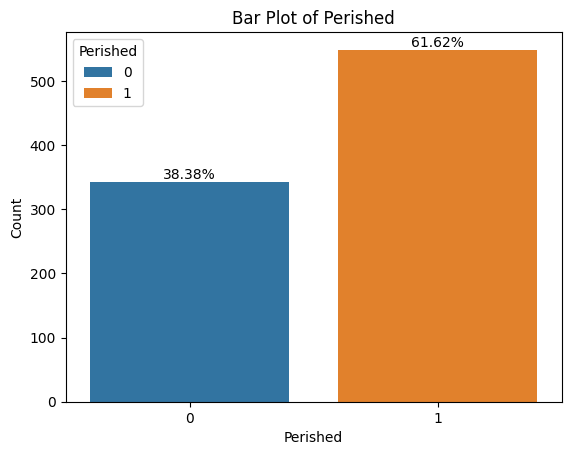

In [594]:
barplot_binary_target(train_df, 'Perished')

大きな不均衡は見られない。

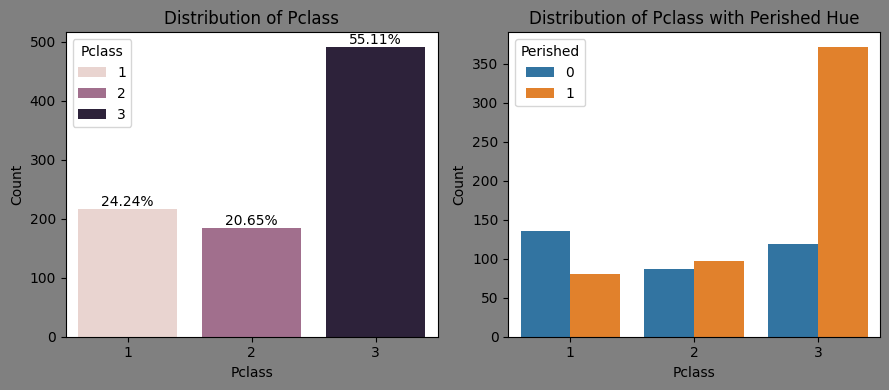

In [595]:
barplot_categorical(train_df, 'Pclass', 'Perished')

クラスが高ければ高いほど生存率が上がる。

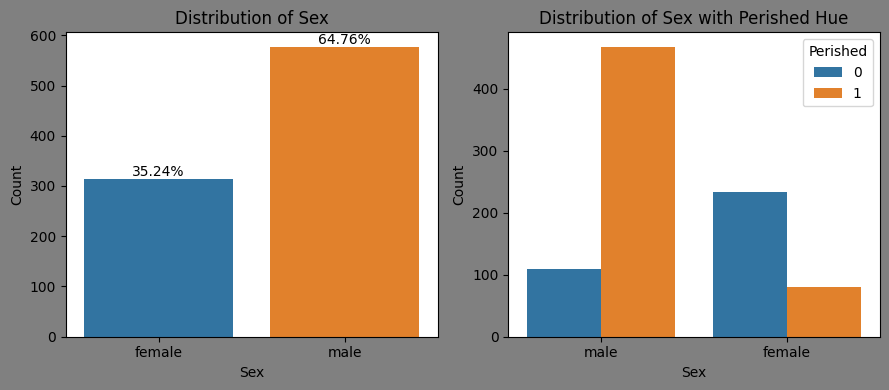

In [596]:
barplot_categorical(train_df, 'Sex', 'Perished')

男性のほうが死亡率が高い。

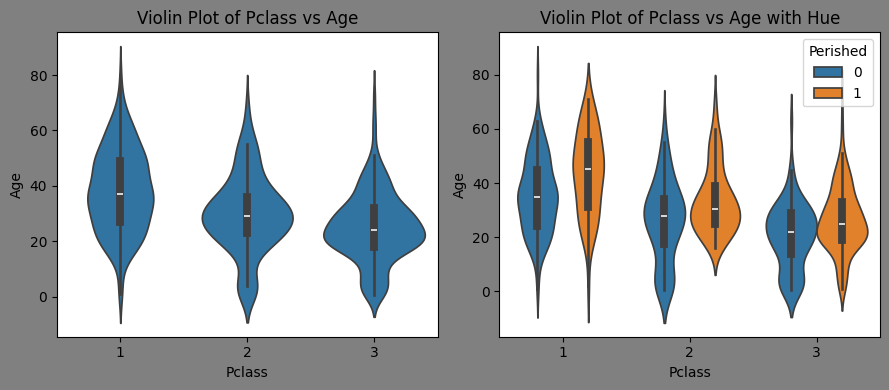

In [597]:
violinplot_binary(train_df, 'Age', 'Pclass', 'Perished')

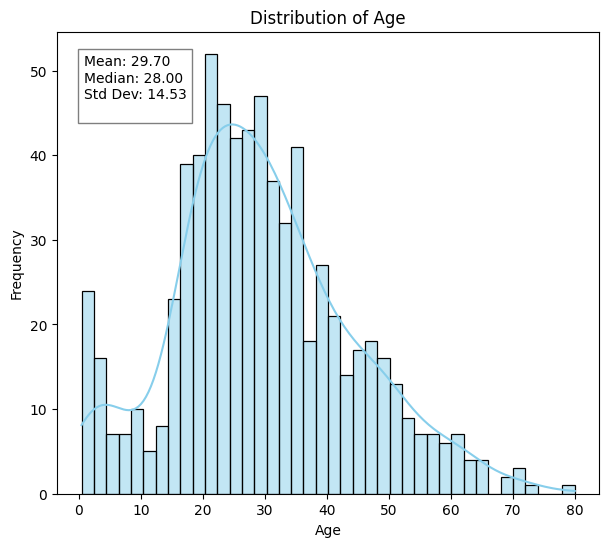

In [598]:
distribution_plot(train_df,'Age')

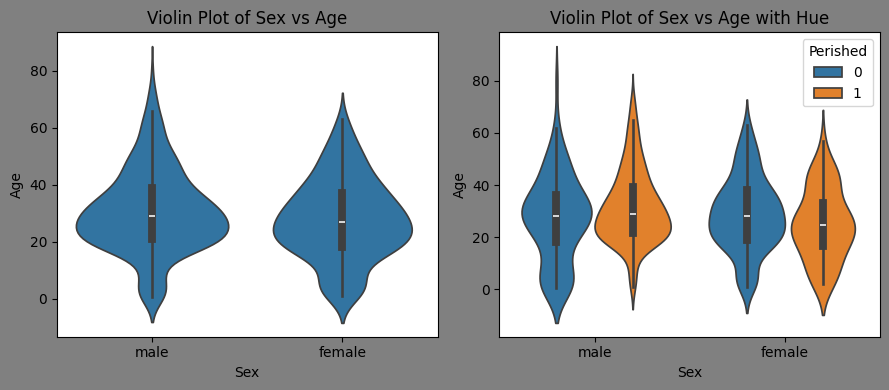

In [599]:
violinplot_binary(train_df, 'Age', 'Sex', 'Perished')

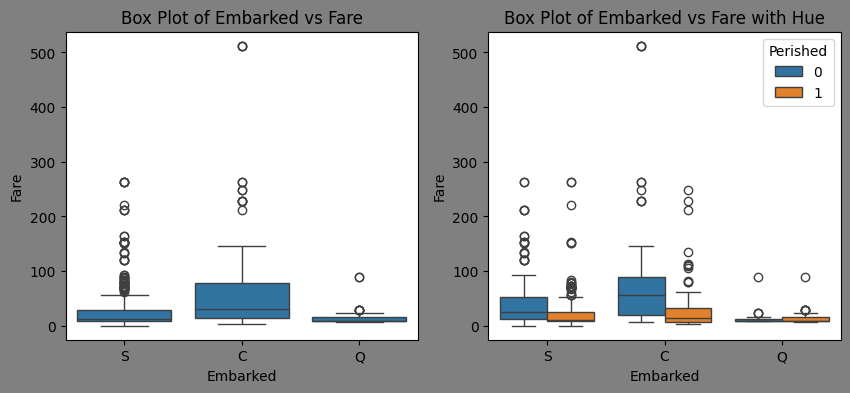

In [600]:
boxplot_cont_cat(train_df, 'Fare', 'Embarked', 'Perished')

料金に対して一つ異常に値段の高い数値が見受けられる。バイアスを回避するために消すのも一つの手かもしれない。

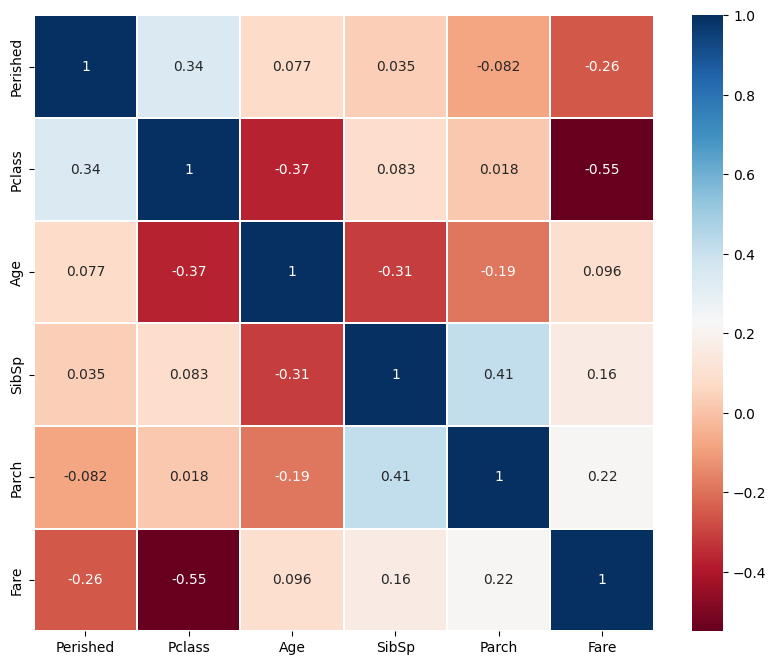

In [601]:
#Observe corellation via heatm map
numerical_cols = train_df.select_dtypes(exclude='object').columns #can be used later preprocess

sns.heatmap(train_df[numerical_cols].corr(), annot=True, cmap = 'RdBu', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)

ParchとSibSpに正の相関、FareとPclass、AgeとPclass、SibSpとAgeに負の相関

## Null Values
欠損値を含むのは、
* train: Age, Cabin, Embarked
* test: Age, Cabin, Fare

In [602]:
train_df.isnull().sum()

Perished      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [603]:
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

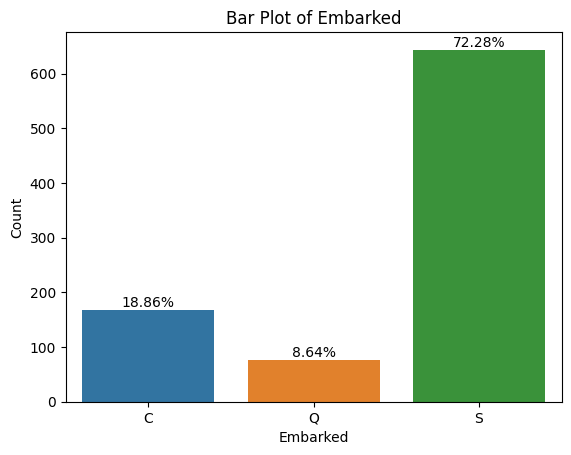

In [604]:
barplot_categorical(train_df, 'Embarked')

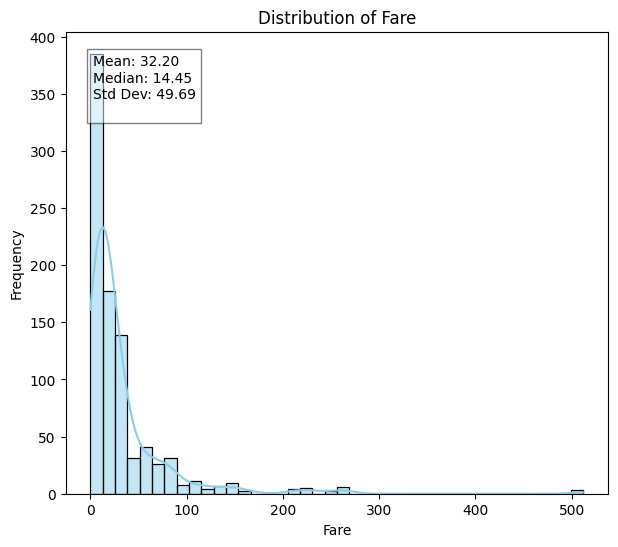

In [605]:
distribution_plot(train_df, 'Fare') #train has more precise statistical information due to its size

In [606]:
#Drop cabin column
#Impute test:Fare with mean value and train:Embarked with 'S'
train_df['Embarked'].fillna('S', inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)

fare_mean = pd.concat([train_df['Age'], test_df['Age']]).mean()
test_df['Fare'].fillna(fare_mean, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

C:\Users\Issei\AppData\Local\Temp\ipykernel_1104\1666081747.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna('S', inplace=True)
C:\Users\Issei\AppData\Local\Temp\ipykernel_1104\1666081747.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

年齢に関しては少し複雑な補完をしてみる。RandomForrestを用いてimputeする。その為に一度categorical columnsをエンコードした後に行う。

## Categorical Values
* 'Name'をもう少し綺麗にしたい。（MR, Mrsに分けるなど）Ref: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions
* Encodeを行う

In [607]:
import re
train_df['Title'] = train_df.Name.str.extract(r'\s+(\w+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(r'\s+(\w+)\.', expand=False) #testにも同様の処理
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [608]:
train_df['Title'].replace(['Master', 'Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'Rare', inplace=True)
train_df['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
train_df['Title'].replace('Mme', 'Mrs', inplace=True)

test_df['Title'].replace(['Master', 'Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Dona'], 'Rare', inplace=True)
test_df['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
test_df['Title'].replace('Mme', 'Mrs', inplace=True)
train_df['Title'].value_counts()

C:\Users\Issei\AppData\Local\Temp\ipykernel_1104\1164566155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Title'].replace(['Master', 'Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'Rare', inplace=True)
C:\Users\Issei\AppData\Local\Temp\ipykernel_1104\1164566155.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becau

Title
Mr      517
Miss    185
Mrs     126
Rare     63
Name: count, dtype: int64

Masterの数未満のタイトルをRareと置き、One-Hot Encodeする。

In [609]:
train_df['Family'] = train_df.Name.str.extract(r'(\w+),', expand=False)
test_df['Family'] = test_df.Name.str.extract(r'(\w+),', expand=False)

train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
train_df['Family'].value_counts()

Family
Andersson    9
Sage         7
Panula       6
Johnson      6
Skoog        6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 666, dtype: int64

ordinaryEncodeするが、精度をみて使うか判断。

In [610]:
#Encode categorical columns
cat_cols = train_df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Sex', 'Ticket', 'Embarked', 'Title', 'Family'], dtype='object')


One-Hot Encoding: Sex, Embarked, Title

Ordinary Encodin: Family, Very high cardinality

Drop column: Ticket(Drop this time), Cabin(due to null values)

In [611]:
from sklearn.preprocessing import OrdinalEncoder
ohe_cols = ['Sex', 'Embarked', 'Title']
oe_cols = ['Family']

#Do One-Hot Encoding
encoded_train_df = pd.get_dummies(train_df, columns=ohe_cols)
encoded_test_df = pd.get_dummies(test_df, columns=ohe_cols)

#Ordinary Encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_train_df['Encoded Family'] = encoder.fit_transform(encoded_train_df[oe_cols])
encoded_test_df['Encoded Family'] = encoder.transform(encoded_test_df[oe_cols])

#Drop unnecesary columns
encoded_train_df.drop(['Ticket', 'Family'], axis=1, inplace=True)
encoded_test_df.drop(['Ticket', 'Family'], axis=1, inplace=True)

#Check dataframe
encoded_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Perished        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Age             714 non-null    float64
 3   SibSp           891 non-null    int64  
 4   Parch           891 non-null    int64  
 5   Fare            891 non-null    float64
 6   Sex_female      891 non-null    bool   
 7   Sex_male        891 non-null    bool   
 8   Embarked_C      891 non-null    bool   
 9   Embarked_Q      891 non-null    bool   
 10  Embarked_S      891 non-null    bool   
 11  Title_Miss      891 non-null    bool   
 12  Title_Mr        891 non-null    bool   
 13  Title_Mrs       891 non-null    bool   
 14  Title_Rare      891 non-null    bool   
 15  Encoded Family  891 non-null    float64
dtypes: bool(9), float64(3), int64(4)
memory usage: 63.5 KB


## Advanced Imputation of Null Values in 'Age'
まずはtrainからPerishedとFeatureに分ける、その後FeatureのみでAgeをImputeする。これはData Leackageを回避するためと、testにはPerishedのデータが含まれていないため。その後、RandomForrestでimputeする。

In [612]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Separate the data into target and feature
imputation_df = encoded_train_df.drop('Perished', axis=1, inplace=False)
target_df = encoded_train_df['Perished']

#separte feature data into data to be imputed and used as train
imp_train_df = imputation_df.loc[imputation_df['Age'].notnull()]
imp_test_df = imputation_df.loc[imputation_df['Age'].isnull()]

#separate again the train data into a data artificialy be plugged nan values and clean one to calculate accuracy.
nan_imp_train_df = imp_train_df.copy()
nan_imp_train_df.loc[nan_imp_train_df.sample(frac=0.05, random_state=0).index, 'Age'] = np.nan

pure_imp_train_df = nan_imp_train_df.loc[nan_imp_train_df['Age'].notnull()]
valid_imp_train_df = nan_imp_train_df.loc[nan_imp_train_df['Age'].isnull()]

#use pure train data to train the model
X_imp_train = pure_imp_train_df.drop('Age', axis=1)
y_imp_train = pure_imp_train_df['Age']

imputation_model = RandomForestRegressor(random_state=0)
imputation_model.fit(X_imp_train, y_imp_train)

X_imp_test = valid_imp_train_df.drop('Age', axis=1)
X_imp_test['Age'] = imputation_model.predict(X_imp_test)

#impute by mean value
mean_age = imp_train_df['Age'].mean()
imputed_values_mean = np.full(shape=len(X_imp_test), fill_value=mean_age)

#check accuracy and compare the cases where imputed by mean values.
true_values = imp_train_df.loc[X_imp_test.index, 'Age']
imputed_values = X_imp_test['Age']

rmse_model = mean_squared_error(true_values, imputed_values, squared=False)

rmse_mean = mean_squared_error(true_values, imputed_values_mean, squared=False)

print("RMSE for Model-Based Imputation:", rmse_model)
print("RMSE for Mean Imputation:", rmse_mean)


RMSE for Model-Based Imputation: 11.94889984150615
RMSE for Mean Imputation: 16.406891430111365


C:\Users\Issei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Issei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


平均値でImputeするより精度が良さそうなので、採用。モデル自体を調整してさらに精度を上げられると思うが、今回はスキップする。

In [618]:
#Impute with trained model
drp_encoded_train_df = encoded_train_df.drop('Perished', axis=1)
pp_train_df = encoded_train_df.copy()
imputed_values = imputation_model.predict(drp_encoded_train_df.loc[drp_encoded_train_df['Age'].isnull()].drop('Age', axis=1))
pp_train_df.loc[encoded_train_df['Age'].isnull(), 'Age'] = imputed_values

pp_test_df = encoded_test_df.copy()
imputed_values = imputation_model.predict(encoded_test_df.loc[encoded_test_df['Age'].isnull()].drop('Age', axis=1))
pp_test_df.loc[encoded_test_df['Age'].isnull(), 'Age'] = imputed_values
pp_test_df.isnull().sum()

Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rare        0
Encoded Family    0
dtype: int64

pp はPre Processedの省略系。

# Choose a Model
ベースモデルの選定をする

In [621]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
#Import Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM Classifier': SVC(),
    'XGB': XGBClassifier(),
    'LightGB': LGBMClassifier(verbose=-1)}

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

X = pp_train_df.drop(['Perished'], axis=1)
y = pp_train_df['Perished']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

for i in models:
    #Fit the models
    model = models[i]
    model.fit(X_train, y_train)
    model_pred = model.predict(X_valid)
    
    #Calculate the scores
    accuracy = accuracy_score(y_valid, model_pred>0.5)
    precision = precision_score(y_valid, model_pred>0.5,average='weighted')
    recall = recall_score(y_valid, model_pred>0.5,average='weighted')
    f1 = f1_score(y_valid, model_pred>0.5,average='weighted')
    
    #Store the Results
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

results_df = pd.DataFrame(results)


print(results_df)

C:\Users\Issei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.782123   0.785905  0.782123  0.783398
1        Random Forest  0.843575   0.843575  0.843575  0.843575
2       SVM Classifier  0.653631   0.692629  0.653631  0.570498
3                  XGB  0.826816   0.825782  0.826816  0.826056
4              LightGB  0.826816   0.826048  0.826816  0.824178


# Feature Cleaning and Engineering
今回はスキップ。

In [619]:
pp_train_df.head()

,Perished,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Encoded Family
PassengerId,,,,,,,,,,,,,,,,
1,1,3,22.0,1,0,7.2500,False,True,False,False,True,False,True,False,False,73.0
2,0,1,38.0,1,0,71.2833,True,False,True,False,False,False,False,True,False,142.0
3,0,3,26.0,0,0,7.9250,True,False,False,False,True,True,False,False,False,258.0
4,0,1,35.0,1,0,53.1000,True,False,False,False,True,False,False,True,False,204.0
5,1,3,35.0,0,0,8.0500,False,True,False,False,True,False,True,False,False,11.0


#